In [1]:
import rdkit
import rdkit.Chem as Chem
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
drugs = []
with open("drugs.smi") as fp:
    for l in fp:
        smiles = l.strip() 
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            drugs.append(mol)

### RDKit descriptors: https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html

## Lipinski's rule of five
1. No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
2. No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
3. A molecular mass less than 500 daltons
4. An octanol-water partition coefficient[6] (log P) that does not exceed 5

## 분자표현자(molecular descriptor)를 계산하는데 필요한 함수를 불러오자!

In [3]:
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcNumLipinskiHBA, CalcNumLipinskiHBD, CalcCrippenDescriptors

In [4]:
# descriptor를 저장할 딕셔너리를 초기화 하자. 
# Key: 물성
# Value: 물성 값이 들어가있는 리스트.
properties = {"MW":[], "Num_HBA": [], "Num_HBD": [], "logp": [], "is_drug": 1}

In [5]:
for mol in drugs:
    mw = CalcExactMolWt(mol) # 분자량 계산
    properties["MW"].append(mw)
    hba = CalcNumLipinskiHBA(mol) # 수소결합 받개 개수 계산
    properties["Num_HBA"].append(hba)
    hbd = CalcNumLipinskiHBD(mol) # 수소결합 주개 개수 계산
    properties["Num_HBD"].append(hbd)
    logp, mr = CalcCrippenDescriptors(mol) # logP와 molar refractivity를 계산.
    properties["logp"].append(logp)

In [6]:
properties

{'MW': [315.00072404,
  171.104799416,
  1343.5878012219998,
  211.110947416,
  204.072119384,
  86.08439831999999,
  140.106196384,
  465.19132297600004,
  472.2335221360001,
  447.23827316800003,
  324.11437811999997,
  353.08993719999995,
  308.104858992,
  309.07832696,
  820.880323412,
  530.148760736,
  613.769650768,
  151.063328528,
  221.988132052,
  181.040878832,
  337.14378433999997,
  75.0320284,
  163.030314148,
  373.11479271999997,
  361.13140808800006,
  307.026291388,
  180.042258736,
  321.143704088,
  370.101230156,
  296.116092372,
  254.094294308,
  244.089957876,
  242.094294308,
  260.050715244,
  293.16404560800004,
  226.110613068,
  501.287908728,
  501.198849614,
  234.125594436,
  392.20999275599996,
  471.313729552,
  519.10105154,
  613.3628049839999,
  239.152143532,
  225.136493468,
  240.1473925,
  309.194008344,
  239.152143532,
  291.21982916800005,
  344.2562742519999,
  219.110672644,
  474.23793882,
  149.12044948,
  473.13987748400007,
  318.0658

## Pandas 데이터프레임으로 저장. 

In [7]:
drug_df = pd.DataFrame(properties)

* 각 특성의 통계치들을 확인 

In [8]:
drug_df.describe()

,MW,Num_HBA,Num_HBD,logp,is_drug
count,600.000000,600.000000,600.000000,600.000000,600.0
mean,373.048343,5.848333,1.871667,3.061503,1.0
std,225.018410,5.333799,2.967582,2.139073,0.0
min,46.041865,1.000000,0.000000,-11.627860,1.0
25%,263.188529,3.000000,1.000000,1.785350,1.0
50%,339.194677,5.000000,1.500000,3.073600,1.0
75%,443.416526,7.000000,3.000000,4.219398,1.0
max,4111.115377,104.000000,61.000000,17.853900,1.0


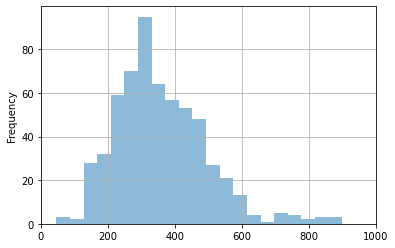

In [9]:
ax = drug_df["MW"].plot.hist(bins=100, alpha=0.5, xlim=(0, 1000), grid=True)

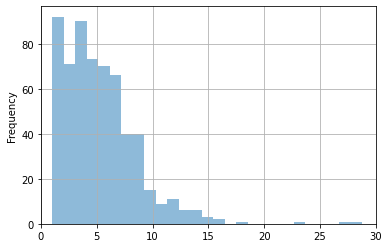

In [10]:
ax = drug_df["Num_HBA"].plot.hist(bins=100, alpha=0.5, xlim=(0, 30), grid=True)

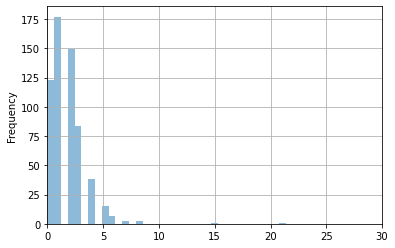

In [11]:
ax = drug_df["Num_HBD"].plot.hist(bins=100, alpha=0.5, xlim=(0, 30), grid=True)

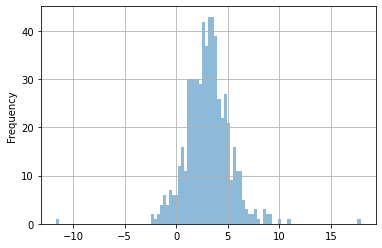

In [12]:
ax = drug_df["logp"].plot.hist(bins=100, alpha=0.5, grid=True)

array([[<AxesSubplot:title={'center':'MW'}>,
        <AxesSubplot:title={'center':'Num_HBA'}>],
       [<AxesSubplot:title={'center':'Num_HBD'}>,
        <AxesSubplot:title={'center':'logp'}>],
       [<AxesSubplot:title={'center':'is_drug'}>, <AxesSubplot:>]],
      dtype=object)

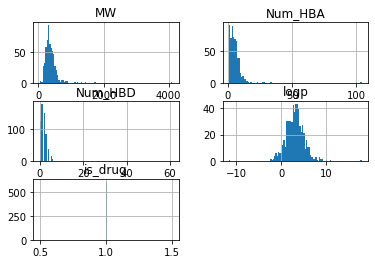

In [13]:
drug_df.hist(bins=100)

## Repeat the same procedure with non-drugs.

In [14]:
non_drugs = []
with open("non_drugs.smi") as fp:
    for l in fp:
        smiles = l.strip()
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            non_drugs.append(mol)

RDKit ERROR: [09:30:38] SMILES Parse Error: syntax error while parsing: smiles
RDKit ERROR: [09:30:38] SMILES Parse Error: Failed parsing SMILES 'smiles' for input: 'smiles'
RDKit WARNING: [09:30:38] WARNING: not removing hydrogen atom without neighbors


In [16]:
properties = {"MW":[], "Num_HBA": [], "Num_HBD": [], "logp": [], "is_drug": 0}

In [17]:
for mol in non_drugs:
    mw = CalcExactMolWt(mol)
    properties["MW"].append(mw)
    hba = CalcNumLipinskiHBA(mol)
    properties["Num_HBA"].append(hba)
    hbd = CalcNumLipinskiHBD(mol)
    properties["Num_HBD"].append(hbd)
    logp, mr = CalcCrippenDescriptors(mol)
    properties["logp"].append(logp)

In [18]:
non_drugs_df = pd.DataFrame(properties)

In [19]:
non_drugs_df

,MW,Num_HBA,Num_HBD,logp,is_drug
0,240.220164,3,1,1.87700,0
1,281.156183,4,2,2.59610,0
2,302.073452,4,2,3.52380,0
3,282.255880,2,0,5.66270,0
4,291.231063,4,1,2.20530,0
...,...,...,...,...,...
994,674.298346,11,6,5.12654,0
995,437.004489,7,2,4.10954,0
996,375.100414,5,1,3.70520,0
997,1250.664991,14,0,19.16620,0


In [20]:
all_pd = pd.concat([drug_df, non_drugs_df])

In [21]:
all_pd

,MW,Num_HBA,Num_HBD,logp,is_drug
0,315.000724,4,1,2.63360,1
1,171.104799,1,1,1.89670,1
2,1343.587801,27,15,0.92454,1
3,211.110947,3,1,1.80390,1
4,204.072119,2,0,2.14610,1
...,...,...,...,...,...
994,674.298346,11,6,5.12654,0
995,437.004489,7,2,4.10954,0
996,375.100414,5,1,3.70520,0
997,1250.664991,14,0,19.16620,0


In [22]:
import sklearn

In [23]:
from sklearn.ensemble import RandomForestClassifier

* 참고자료: https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

In [24]:
my_rf = RandomForestClassifier()

In [25]:
X = all_pd.iloc[:,:-1] # Feature data

In [26]:
y = all_pd.iloc[:, -1] # Answer

In [27]:
print(X)

              MW  Num_HBA  Num_HBD      logp
0     315.000724        4        1   2.63360
1     171.104799        1        1   1.89670
2    1343.587801       27       15   0.92454
3     211.110947        3        1   1.80390
4     204.072119        2        0   2.14610
..           ...      ...      ...       ...
994   674.298346       11        6   5.12654
995   437.004489        7        2   4.10954
996   375.100414        5        1   3.70520
997  1250.664991       14        0  19.16620
998   518.221700        7        1   5.44250

[1599 rows x 4 columns]


In [28]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
994    0
995    0
996    0
997    0
998    0
Name: is_drug, Length: 1599, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
my_rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = my_rf.predict(X_test)

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
precision_score(y_test, y_pred)

0.5684210526315789

In [34]:
recall_score(y_test, y_pred)

0.4186046511627907

In [35]:
f1_score(y_test, y_pred)

0.4821428571428571

In [38]:
X_test

,MW,Num_HBA,Num_HBD,logp
203,338.016057,8,5,-0.12410
124,430.061041,6,2,2.87958
350,170.105528,4,2,-0.12730
82,236.928676,3,0,1.44860
726,453.196459,6,2,1.36610
...,...,...,...,...
659,207.071785,2,1,2.77300
695,224.096106,4,2,1.23960
555,315.183444,4,2,3.33830
363,435.005545,4,1,4.02260
